In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# train= pd.read_csv('mnist_train.csv')
# train
# test = pd.read_csv('mnist_test.csv')
# test
# x_train = train.drop(['label'],axis=1).values
# y_train = train['label'].values
# x_test = test.drop(['label'],axis=1).values
# y_test = test['label'].values

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [ ]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
h = model.fit(X_train,Y_train, epochs=10, validation_data=(X_test,Y_test),batch_size=128)

Epoch 1/10
469/469 [==============================] - 44s 93ms/step - loss: 1.2846 - accuracy: 0.6573 - val_loss: 0.4064 - val_accuracy: 0.8834
Epoch 2/10
469/469 [==============================] - 46s 97ms/step - loss: 0.3383 - accuracy: 0.8993 - val_loss: 0.2538 - val_accuracy: 0.9237
Epoch 3/10
469/469 [==============================] - 44s 93ms/step - loss: 0.2446 - accuracy: 0.9271 - val_loss: 0.2112 - val_accuracy: 0.9372
Epoch 4/10
469/469 [==============================] - 43s 92ms/step - loss: 0.1924 - accuracy: 0.9430 - val_loss: 0.1604 - val_accuracy: 0.9534
Epoch 5/10
469/469 [==============================] - 43s 91ms/step - loss: 0.1578 - accuracy: 0.9538 - val_loss: 0.1295 - val_accuracy: 0.9612
Epoch 6/10
469/469 [==============================] - 44s 94ms/step - loss: 0.1361 - accuracy: 0.9600 - val_loss: 0.1117 - val_accuracy: 0.9664
Epoch 7/10
469/469 [==============================] - 45s 95ms/step - loss: 0.1202 - accuracy: 0.9648 - val_loss: 0.1080 - val_accuracy:

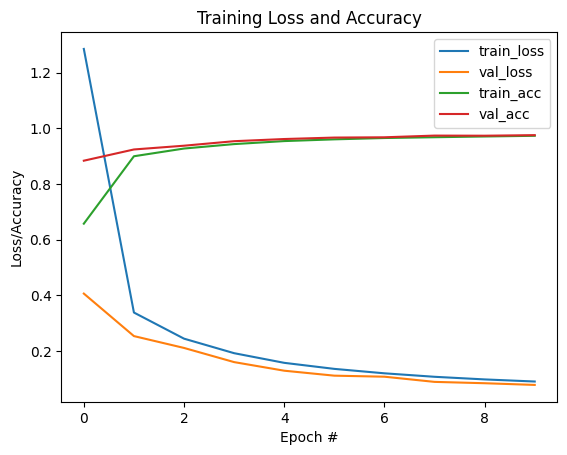

In [ ]:
plt.figure()
plt.plot(np.arange(0, 10), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()